### Варінат №6 (data6.csv)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#завантаження датасету
data = pd.read_csv('/Users/sofiialukashevych/Desktop/data6.csv', sep=None, engine='python')

In [3]:
print("Dataset Info:")
print(data.info())
print("\nDataset Description:")
print(data.describe())
print("\nClass Distribution:")
print(data.iloc[:, -1].value_counts())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   1.69988508771284  359 non-null    float64
 1   1.54678249471083  359 non-null    float64
 2   1                 359 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 8.5 KB
None

Dataset Description:
       1.69988508771284  1.54678249471083           1
count        359.000000        359.000000  359.000000
mean           0.613576          2.427376    0.665738
std            1.830284          1.106281    0.472390
min           -4.696166          0.500000    0.000000
25%           -0.672366          1.885217    0.000000
50%            1.112022          2.124134    1.000000
75%            2.069134          3.236444    1.000000
max            4.636004          4.645751    1.000000

Class Distribution:
1
1    239
0    120
Name: count, dtype: int64


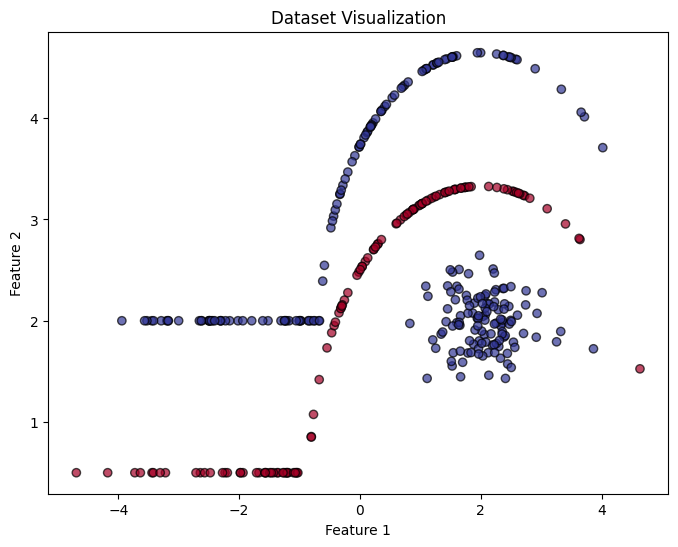

In [44]:
#побудуємо розсіяний графік датасету
plt.figure(figsize=(8, 6))
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=data.iloc[:, -1], cmap=plt.cm.RdYlBu, edgecolor='black', alpha=0.7)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset Visualization')
plt.show()

#### активаційні функції та їх похідні

In [5]:
def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [7]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

In [8]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=1, keepdims=True)

In [49]:
#нейронна мережа (з оптимізатором Adam)
class NeuralNetwork:
    def __init__(self, layers, activation_functions, learning_rate):
        #кількість нейронів у кожному шарі
        self.layers = layers  
        #функції активації для кожного шару
        self.activation_functions = activation_functions
        #швидкість навчання
        self.learning_rate = learning_rate  
        #ініціалізація ваг
        self.weights = [] 
        #ініціалізація зміщень
        self.biases = []  
         #ініціалізація ваг і зміщень
        self.init_weights_and_biases() 
        #параметри для оптимізатора Adam
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.epsilon = 1e-8
        #ініціалізація моментів m
        self.m = [np.zeros_like(w) for w in self.weights]  
        #ініціалізація моментів v
        self.v = [np.zeros_like(w) for w in self.weights]  

    def init_weights_and_biases(self):
        #ініціалізація ваг і зміщень для кожного шару
        for i in range(len(self.layers) - 1):
            weight = np.random.randn(self.layers[i], self.layers[i+1]) * 0.1
            bias = np.zeros((1, self.layers[i+1]))
            self.weights.append(weight)
            self.biases.append(bias)

    def feedforward(self, X):
        #ініціалізація списку активацій
        activations = [X]  
        #проходження через всі шари мережі
        for i in range(len(self.weights)):
            z = np.dot(activations[-1], self.weights[i]) + self.biases[i]
            if self.activation_functions[i] == 'relu':
                activation = relu(z)
            elif self.activation_functions[i] == 'sigmoid':
                activation = sigmoid(z)
            elif self.activation_functions[i] == 'tanh':
                activation = tanh(z)
            elif self.activation_functions[i] == 'softmax':
                activation = softmax(z)
            activations.append(activation)
        return activations

    def backpropagation(self, X, y, activations, t):
        m = X.shape[0]
        deltas = [None] * len(self.weights)
        #помилка вихідного шару
        delta = activations[-1] - y
        deltas[-1] = delta
        #backpropagation
        for i in range(len(self.weights) - 2, -1, -1):
            if self.activation_functions[i] == 'relu':
                delta = np.dot(delta, self.weights[i+1].T) * relu_derivative(activations[i+1])
            elif self.activation_functions[i] == 'sigmoid':
                delta = np.dot(delta, self.weights[i+1].T) * sigmoid_derivative(activations[i+1])
            elif self.activation_functions[i] == 'tanh':
                delta = np.dot(delta, self.weights[i+1].T) * tanh_derivative(activations[i+1])
            deltas[i] = delta

        #оновлення ваг і зміщень (за допомогою оптимізатора Adam)
        for i in range(len(self.weights)):
            self.m[i] = self.beta1 * self.m[i] + (1 - self.beta1) * np.dot(activations[i].T, deltas[i]) / m
            self.v[i] = self.beta2 * self.v[i] + (1 - self.beta2) * (np.dot(activations[i].T, deltas[i]) / m)**2

            m_corrected = self.m[i] / (1 - self.beta1**(t + 1))
            v_corrected = self.v[i] / (1 - self.beta2**(t + 1))

            self.weights[i] -= self.learning_rate * m_corrected / (np.sqrt(v_corrected) + self.epsilon)
            self.biases[i] -= self.learning_rate * np.sum(deltas[i], axis=0, keepdims=True) / m

    def train(self, X, y, epochs):
        #навчання мережі
        for epoch in range(epochs):
            activations = self.feedforward(X)
            self.backpropagation(X, y, activations, epoch)

    def predict(self, X):
        #використання мережі для створення прогнозу
        activations = self.feedforward(X)
        return activations[-1]

    def set_learning_rate(self, new_learning_rate):
        #зміна швидкості навчання (\alpha)
        self.learning_rate = new_learning_rate
    
        
    def accuracy(self, X, y):
        #підрахунок точності моделі
        #X: вхідні спостереження
        #Y: справжні лейбли
        predicted = self.predict(X)
        predicted_labels = (predicted > 0.5).astype(int)
        correct_predictions = np.sum(predicted_labels == y)
        accuracy = correct_predictions / len(y)
        return accuracy
        

In [65]:
#підраунок втрат для епох

def loss_calc(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-15, 1 - 1e-15)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [67]:
def train_network(nn, X, y, epochs):
    
    epoch_losses = []

    for epoch in range(epochs):
        activations = nn.feedforward(X)
        #номер епохи
        nn.backpropagation(X, y, activations, epoch)  

         #підрахунок втрат
        current_loss = loss_calc(y, activations[-1])
        epoch_losses.append(current_loss)

         #вивід втрат для кожної сотої епохи
        if (epoch + 1) % 100 == 0 or epoch == 0:
            print(f'epoch {epoch + 1}/{epochs}, epoch_loss: {current_loss}')

    return epoch_losses

In [18]:
#візуалізація областей класифікації
def plot_classification_regions(X, y, model, resolution=0.02):
    #налаштуємо маркери та кольорові схеми
    #s, x типи маркерів для різних класів
    markers = ('s', 'x') 
    #кольори для класів
    colors = ('red', 'blue') 
    #кольорова схема фону
    cmap = plt.cm.RdYlBu  

    #визначимо межі рішення
    #min, max для осі X1
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  
    #min, max для осі X2
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #сітка для фону
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))  
    
    #прогнозування класів для кожної точки сітки
    Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)  
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    #вхзуалізація точок даних
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y.reshape(-1) == cl, 0], y=X[y.reshape(-1) == cl, 1],
                    alpha=0.8, c=colors[idx], marker=markers[idx], label=cl, edgecolor='black') 

    plt.xlabel('Feature 1')  
    plt.ylabel('Feature 2')  
    plt.legend(loc='upper left')  
    plt.title('Classification Regions')  

In [19]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

In [20]:
X_normalized = (X - X.mean(axis=0)) / X.std(axis=0)

In [50]:
#тренуємо модель

#модлеь має:
#2 нейрони вхідного шару, 5 нейронів прихованого шару, 1 нейрон вихідного шару
#функції активації ReLU для прихованого шару та Sigmoid для вихідного шару
nn = NeuralNetwork(
    layers=[2, 5, 1], 
    activation_functions=['relu', 'sigmoid'], 
    learning_rate=0.01
)
nn.train(X_normalized, y, epochs=1000)

In [68]:
train_network(nn, X_normalized, y, epochs=1000)

epoch 1/1000, epoch_loss: 0.29795863373785336
epoch 100/1000, epoch_loss: 0.29739347535106103
epoch 200/1000, epoch_loss: 0.2969373512382312
epoch 300/1000, epoch_loss: 0.29648336908602196
epoch 400/1000, epoch_loss: 0.2960317077697551
epoch 500/1000, epoch_loss: 0.2956117010624024
epoch 600/1000, epoch_loss: 0.2952424900935596
epoch 700/1000, epoch_loss: 0.2945143336253768
epoch 800/1000, epoch_loss: 0.29386576995993186
epoch 900/1000, epoch_loss: 0.2924887672595586
epoch 1000/1000, epoch_loss: 0.2915745826855497


[0.29795863373785336,
 0.29787803440053034,
 0.29786462254441276,
 0.2978735064754233,
 0.29787854920606877,
 0.2978803572467875,
 0.29787951341103935,
 0.297876492608337,
 0.29787168280644405,
 0.2978653898770353,
 0.29785784649245983,
 0.2978493623520387,
 0.2978396077372176,
 0.2978290622559972,
 0.2978177553981904,
 0.2978058146783819,
 0.2977947298980522,
 0.2977845952771022,
 0.2977785795375799,
 0.2977981470773648,
 0.29778073421528045,
 0.2977635860369069,
 0.297765014340494,
 0.29776607607363,
 0.29776526175753093,
 0.2977625931081498,
 0.2977584565974147,
 0.297752383809997,
 0.2977448727780544,
 0.29773626642996187,
 0.2977265879921943,
 0.29771737425892325,
 0.2977082812470065,
 0.29771611248337,
 0.29769637199466825,
 0.2976927880468153,
 0.29768834252627235,
 0.2976831028529101,
 0.29767714749980645,
 0.2976859301821015,
 0.2976695268939442,
 0.29766780675253823,
 0.2976650350749991,
 0.29766127266092174,
 0.2976560777819293,
 0.29765013820671743,
 0.29764341303781544,
 0

/var/folders/4b/b3hx73cj4fzcm29xwvlsn2j80000gn/T/ipykernel_94036/2273569823.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y.reshape(-1) == cl, 0],


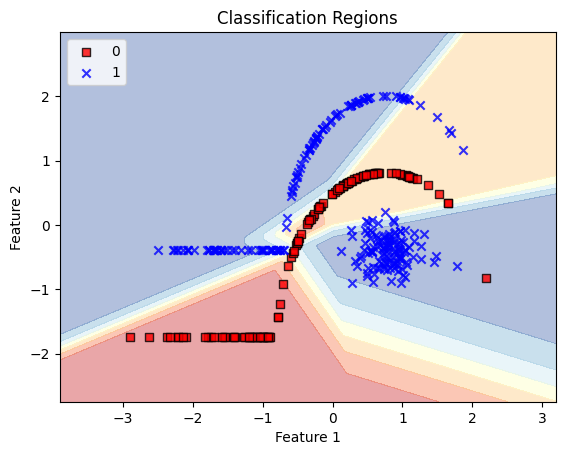

In [22]:
plot_classification_regions(X_normalized, y, nn)
plt.show()

In [23]:
#точність моделі
accuracy = nn.accuracy(X_normalized, y)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 95.82%


In [35]:
#тренуємо модель

#модлеь має:
#2 нейрони вхідного шару, 10 нейронів у кожному з двох прихованих шарів, 1 нейрон вихідного шару
#функції активації ReLU для прихованих шарів та Sigmoid для вихідного шару
nn1 = NeuralNetwork(
    layers=[2, 10, 10, 1], 
    activation_functions=['relu', 'relu', 'sigmoid'],  
    learning_rate=0.005
)
nn1.train(X_normalized, y, epochs=1500)


In [69]:
train_network(nn1, X_normalized, y, epochs=1500)

epoch 1/1500, epoch_loss: 0.005424784650339537
epoch 100/1500, epoch_loss: 0.0050270439213262715
epoch 200/1500, epoch_loss: 0.0046746837155404964
epoch 300/1500, epoch_loss: 0.004342046794972322
epoch 400/1500, epoch_loss: 0.004023424244310979
epoch 500/1500, epoch_loss: 0.003725568676034093
epoch 600/1500, epoch_loss: 0.0035385582612035018
epoch 700/1500, epoch_loss: 0.0032969119205370997
epoch 800/1500, epoch_loss: 0.003100277301162945
epoch 900/1500, epoch_loss: 0.0029377359102231116
epoch 1000/1500, epoch_loss: 0.0028069548472630665
epoch 1100/1500, epoch_loss: 0.0028557769226061082
epoch 1200/1500, epoch_loss: 0.0026141701371271827
epoch 1300/1500, epoch_loss: 0.0025949319874712887
epoch 1400/1500, epoch_loss: 0.0024547129756006037
epoch 1500/1500, epoch_loss: 0.0023617594907542087


[0.005424784650339537,
 0.005409201710173085,
 0.005388388661386293,
 0.005369739615519439,
 0.005355100178366274,
 0.005342509877741925,
 0.005330954143857719,
 0.0053385104248173335,
 0.005321726724427716,
 0.005319845903488392,
 0.005322871726796925,
 0.005315888637331578,
 0.0053191203703115445,
 0.0053154301550759064,
 0.005305023415495995,
 0.005311584268177532,
 0.005298798383081126,
 0.005299727939294413,
 0.005294500423491883,
 0.005284571080609834,
 0.005280715709805863,
 0.005275194101811389,
 0.005276380694308714,
 0.0052713244973011004,
 0.0052620611268250645,
 0.0052621809643861985,
 0.005262343605158221,
 0.005263897032131118,
 0.005261295080509511,
 0.005257209462599364,
 0.005251509462256633,
 0.005242680672750132,
 0.0052330193164080085,
 0.0052396241243670314,
 0.005235394376370175,
 0.005235023079056404,
 0.00522790804938443,
 0.005224847436810161,
 0.00522290728628301,
 0.005222920965149201,
 0.005223343255414249,
 0.005216822870132982,
 0.005206418007729345,
 0.00

/var/folders/4b/b3hx73cj4fzcm29xwvlsn2j80000gn/T/ipykernel_94036/2273569823.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y.reshape(-1) == cl, 0],


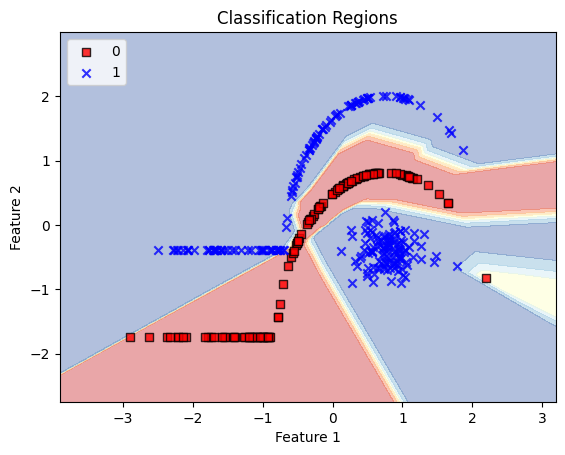

In [38]:
plot_classification_regions(X_normalized, y, nn1)
plt.show()

In [41]:
accuracy = nn1.accuracy(X_normalized, y)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 100.00%


In [36]:
#тренуємо модель

#модлеь має:
#2 нейрони вхідного шару, 20 нейронів у прихованому шарі, 1 нейрон вихідного шару
#функції активації Tanh для прихованого шару та Sigmoid для вихідного шару
nn2 = NeuralNetwork(
    layers=[2, 20, 1],
    activation_functions=['tanh', 'sigmoid'], 
    learning_rate=0.01 
)
nn2.train(X_normalized, y, epochs=1000)

In [70]:
train_network(nn2, X_normalized, y, epochs=1000)

epoch 1/1000, epoch_loss: 0.09902521925236817
epoch 100/1000, epoch_loss: 0.08742870756301219
epoch 200/1000, epoch_loss: 0.07690983915783252
epoch 300/1000, epoch_loss: 0.06801566422968874
epoch 400/1000, epoch_loss: 0.06083844330711926
epoch 500/1000, epoch_loss: 0.05073747442019598
epoch 600/1000, epoch_loss: 0.038153516531428164
epoch 700/1000, epoch_loss: 0.03056516582516537
epoch 800/1000, epoch_loss: 0.02598728405034866
epoch 900/1000, epoch_loss: 0.022264116189577726
epoch 1000/1000, epoch_loss: 0.019430924959209412


[0.09902521925236817,
 0.0989277335183678,
 0.09886314534654657,
 0.0987655705915696,
 0.09861256036898809,
 0.09843384914104342,
 0.0982669197042344,
 0.09812794963083117,
 0.09801643565192229,
 0.09792235105288143,
 0.09782639069370887,
 0.09770892320118933,
 0.09756582460871889,
 0.09741105273759555,
 0.09726299582078146,
 0.0971322485805883,
 0.09701971025804808,
 0.0969180495772612,
 0.096813578979096,
 0.09669365354392631,
 0.09655653663682445,
 0.09641240013504908,
 0.09627428999543339,
 0.09614966782244504,
 0.09603804465112728,
 0.09593179369381716,
 0.09581972397831885,
 0.09569466544205475,
 0.09555926456454339,
 0.09542321997659728,
 0.09529537741929889,
 0.09517850309545141,
 0.09506847819742803,
 0.0949567383113597,
 0.09483611471013585,
 0.09470663301285706,
 0.09457514885559226,
 0.09444929550622687,
 0.09433208231438027,
 0.0942204426894477,
 0.09410746692424304,
 0.09398760510751998,
 0.09386130793486508,
 0.0937343177953031,
 0.0936124841838846,
 0.09349736027578731,

/var/folders/4b/b3hx73cj4fzcm29xwvlsn2j80000gn/T/ipykernel_94036/2273569823.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y.reshape(-1) == cl, 0],


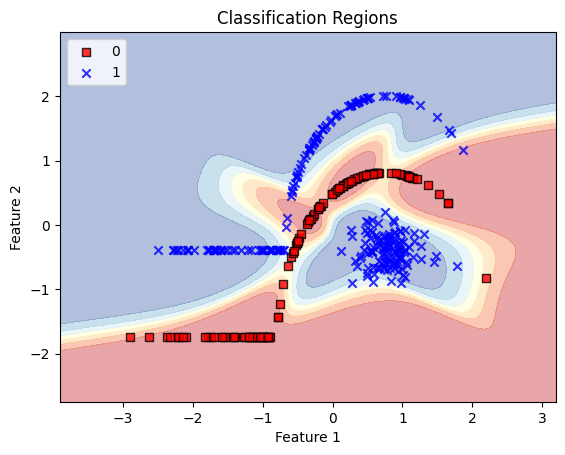

In [39]:
plot_classification_regions(X_normalized, y, nn2)
plt.show()

In [42]:
accuracy = nn2.accuracy(X_normalized, y)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 97.49%


In [37]:
#тренуємо модель

#модлеь має:
#2 нейрони вхідного шару, 15 нейронів у кожному з прихованих шарів, 1 нейрон вихідного шару
#функції активації Sigmoid для першого прихованого шару, ReLU для другого прихованого шару 
#та Sigmoid для вихідного шару
nn3 = NeuralNetwork(
    layers=[2, 15, 15, 1], 
    activation_functions=['sigmoid', 'relu', 'sigmoid'], 
    learning_rate=0.02
)
#тренування мережі
nn3.train(X_normalized, y, epochs=1200)

In [71]:
train_network(nn3, X_normalized, y, epochs=1200)

epoch 1/1200, epoch_loss: 0.26177871834444383
epoch 100/1200, epoch_loss: 0.26081906428167706
epoch 200/1200, epoch_loss: 0.25785365833285506
epoch 300/1200, epoch_loss: 0.28068180206395227
epoch 400/1200, epoch_loss: 0.29761464111027586
epoch 500/1200, epoch_loss: 0.3114108145791428
epoch 600/1200, epoch_loss: 0.2955662036244442
epoch 700/1200, epoch_loss: 0.2858351099466307
epoch 800/1200, epoch_loss: 0.272824477759167
epoch 900/1200, epoch_loss: 0.26757045612841923
epoch 1000/1200, epoch_loss: 0.2708387917488122
epoch 1100/1200, epoch_loss: 0.2705937215791988
epoch 1200/1200, epoch_loss: 0.26196563437917775


[0.26177871834444383,
 0.2618556437202626,
 0.26188091186741846,
 0.2618940338795119,
 0.26191147110194013,
 0.2619553241027355,
 0.26200891566353124,
 0.26202475005191983,
 0.2620476934741765,
 0.26208358343199945,
 0.26211445711799963,
 0.2621418784428275,
 0.26216424167593283,
 0.2621866232111137,
 0.26220987647810173,
 0.26224453703158396,
 0.26227443938334755,
 0.26231954748636516,
 0.26238346548107866,
 0.26242755409273427,
 0.2624647516926013,
 0.26256566967915623,
 0.2626211094912865,
 0.2626539242062062,
 0.26264523049977617,
 0.2626679055427149,
 0.2627192932377119,
 0.2627412619936599,
 0.262748228594477,
 0.2627582244067566,
 0.2627736582902913,
 0.26280674532055204,
 0.262801879378556,
 0.2628029023663465,
 0.26280772113794343,
 0.2628749945342386,
 0.2628914266313327,
 0.2628634028780938,
 0.2628273409701471,
 0.26290860033089997,
 0.2628764300948007,
 0.2629639480001314,
 0.26304278104843,
 0.2630790616138492,
 0.2630576981122583,
 0.26302124612348654,
 0.263105428795570

/var/folders/4b/b3hx73cj4fzcm29xwvlsn2j80000gn/T/ipykernel_94036/2273569823.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y.reshape(-1) == cl, 0],


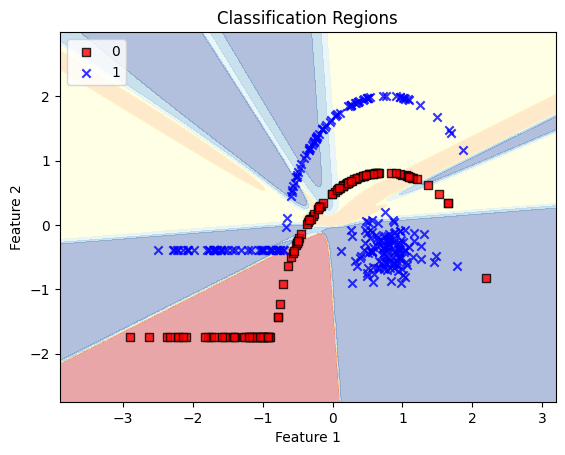

In [40]:
plot_classification_regions(X_normalized, y, nn3)
plt.show()

In [43]:
accuracy = nn3.accuracy(X_normalized, y)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 83.84%
